**Used Car Price Prediction**

using two method 

1. Linear Regression
2. LASSO Regression 

In [163]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [164]:
# read the data
car_data = pd.read_csv('car data.csv')

In [165]:
# first 5 rows of the data
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [166]:
# checking the number of rows and columns
car_data.shape

(301, 9)

In [167]:
# checking for missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [168]:
# information about the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [169]:
# checking total numer of catogorical data in a fuel type, transmission and seller type
car_data['Fuel_Type'].value_counts()


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [170]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [171]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [172]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [173]:
# encoding the catogorical data to numerics
car_data['Fuel_Type'] = car_data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})




In [174]:
car_data['Transmission'] = car_data['Transmission'].map({'Manual':0, 'Automatic':1})


In [175]:

car_data['Seller_Type'] = car_data['Seller_Type'].map({'Dealer':0, 'Individual':1})

In [176]:

car_data.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [177]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [178]:
# spliting the data into traing and test data
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [179]:
X.head(50)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
5,2018,9.83,2071,1,0,0,0
6,2015,8.12,18796,0,0,0,0
7,2015,8.61,33429,1,0,0,0
8,2016,8.89,20273,1,0,0,0
9,2015,8.92,42367,1,0,0,0


In [180]:
# print shape of X and Y
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [181]:
# split in to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [182]:
# print shape of X_train and Y_train

print(X_train.shape)
print(Y_train.shape)

(270, 7)
(270,)


In [183]:
# model linear regression
linear_model = LinearRegression()


In [184]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [185]:
# prediction on training data
Y_train_predict = linear_model.predict(X_train) 

In [186]:
# R squared value
error_score = metrics.r2_score(Y_train, Y_train_predict)
print("error score= ", error_score)

error score=  0.8799451660493711


Text(0.5, 1.0, 'Y_train vs Y_train_predicted ')

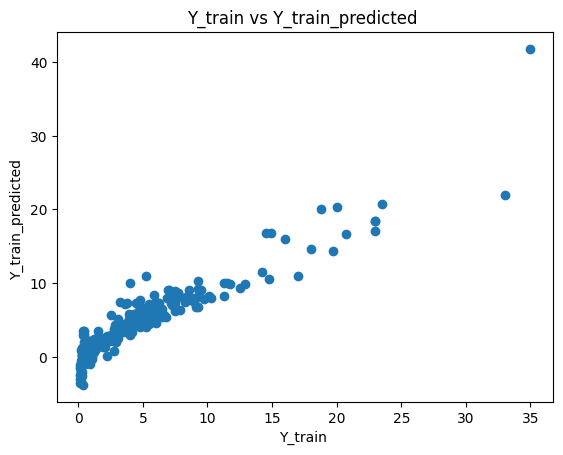

In [187]:
# visualize the actual and predicted values
plt.scatter(Y_train, Y_train_predict)
plt.xlabel("Y_train ")
plt.ylabel("Y_train_predicted ")
plt.title("Y_train vs Y_train_predicted ")

In [188]:

# prediction on test data
Y_test_predict = linear_model.predict(X_test) 

In [189]:
error_score = metrics.r2_score(Y_test, Y_test_predict)
print("error score= ", error_score)

error score=  0.8365766715027051


Text(0.5, 1.0, 'Y_test vs Y_test_predicted ')

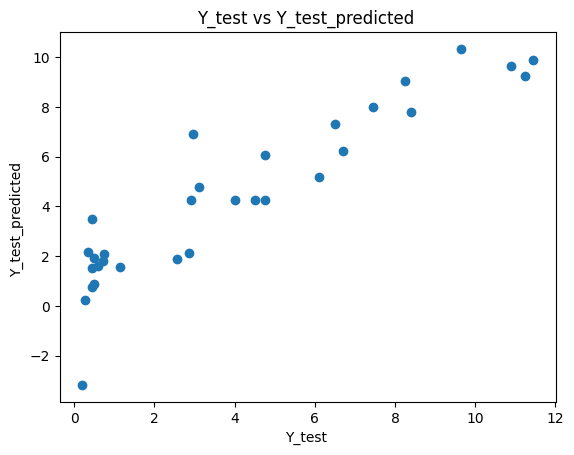

In [190]:
# visualize the actual and predicted values
plt.scatter(Y_test, Y_test_predict)
plt.xlabel("Y_test ")
plt.ylabel("Y_test_predicted ")
plt.title("Y_test vs Y_test_predicted ")

In [192]:
# use LASSO regression
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

In [198]:
# prediction on training data
Y_train_predict = lasso_model.predict(X_train) 

In [199]:
# R squared value
error_score = metrics.r2_score(Y_train, Y_train_predict)
print("error score= ", error_score)


error score=  0.8427856123435794


Text(0.5, 1.0, 'Y_train vs Y_train_predicted ')

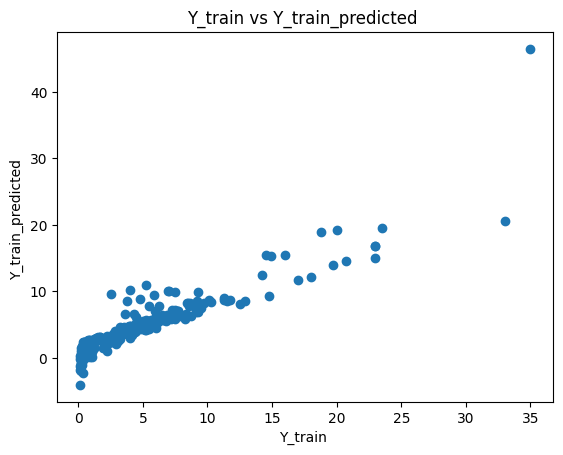

In [200]:
# visualize the actual and predicted values
plt.scatter(Y_train, Y_train_predict)
plt.xlabel("Y_train ")
plt.ylabel("Y_train_predicted ")
plt.title("Y_train vs Y_train_predicted ")

In [202]:
# prediction on test data
Y_test_predict = linear_model.predict(X_test) 
error_score = metrics.r2_score(Y_test, Y_test_predict)
print("error score= ", error_score)

error score=  0.8365766715027051


Text(0.5, 1.0, 'Y_test vs Y_test_predicted ')

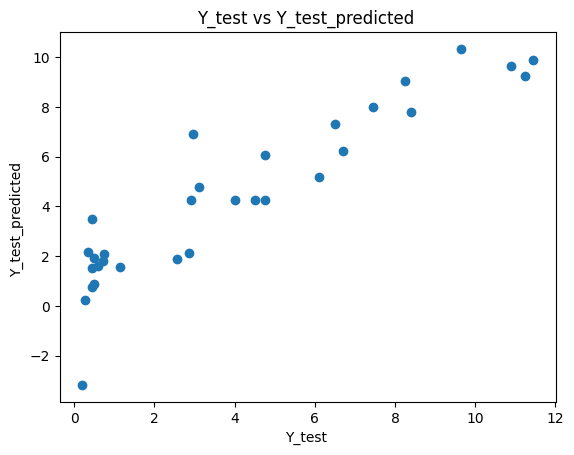

In [ ]:
# visualize the actual and predicted values
plt.scatter(Y_test, Y_test_predict)
plt.xlabel("Y_test ")
plt.ylabel("Y_test_predicted ")
plt.title("Y_test vs Y_test_predicted ")